In [83]:
import csv
import pandas as pd
import mysql.connector
import numpy as np
import fonction as f
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_sql

sql_conn =  mysql.connector.connect(host='213.190.6.22', database='u485051925_tecog', user='u485051925_cogueur',  password='Josiana34')
#sql_conn =  mysql.connector.connect(host='localhost', database='te_cog', user='root',  password='')
query = "SELECT * FROM digit"
data = pd.read_sql(query, sql_conn)

df = data.set_index(['id_sujet', 'serie','trial', 'item'])
df['correct'] = pd.to_numeric(df['correct'])
df.to_csv('digits.csv')
df


correct key_press correct_response       rt  \
id_sujet serie trial item                                                
2        1     1     1         1.0         4                4  2085.09   
                     2         1.0         9                9   719.27   
                     3         1.0         2                2  1021.47   
               2     1         1.0         4                4  1980.94   
                     2         1.0         3                3   912.82   
...                            ...       ...              ...      ...   
3        4     14    4         NaN         6                8    27.00   
                     5         NaN         5                4    26.00   
                     6         NaN         4                6    26.00   
                     7         NaN         3                7    25.00   
                     8         NaN         2                5    26.00   

                           time_elapsed     test_part  
id_sujet serie trial item                              
2        1     1     1           104750   trial_1_1_1  
                     2           105470   trial_1_1_2  
                     3           106492   trial_1_1_3  
               2     1           113979   trial_1_2_1  
                     2           114892   trial_1_2_2  
...                                 ...           ...  
3        4     14    4           966677  trial_4_14_4  
                     5           966702  trial_4_14_5  
                     6           966728  trial_4_14_6  
                     7           966754  trial_4_14_7  
                     8           966781  trial_4_14_8  

[752 rows x 6 columns]

In [84]:
print('Nb participants :', len(sujets))

Nb participants : 2


In [85]:
query = "SELECT * FROM sujets"
sujets = pd.read_sql(query, sql_conn)
sujets

,id_sujet,code_sujet
0,2,test
1,3,test


In [86]:
scores = []
indexSujets = []
nbSeries = 4
for i in sujets['id_sujet']:
    #print('Sujet', i)
    series = []
    indexSujets.append(i)
    for j in range(nbSeries):
        s = np.sum(f.scoring(df.xs(i).xs(j+1)))
        series.append(s)
    #print(series)
    scores.append(series)
scores = pd.DataFrame(scores, index=indexSujets, columns=['Série 1', 'Série 2', 'Série 3', 'Série 4'])
scores


,Série 1,Série 2,Série 3,Série 4
2,2,1,5,5
3,9,8,7,5


In [87]:
scores.mean()

Série 1    5.5
Série 2    4.5
Série 3    6.0
Série 4    5.0
dtype: float64

In [88]:
sujets_score = [[],[],[]]

for i in sujets['id_sujet']:
    series = []
    indexSujets.append(i)
    for j in range(nbSeries):
        sujets_score[0].append(i)
        sujets_score[1].append(j+1)
        sujets_score[2].append(np.sum(f.scoring(df.xs(i).xs(j+1))))


sujets_score = pd.DataFrame(sujets_score).transpose()
sujets_score.columns = ['Sujets', 'Séries', 'Score']
sujets_score

,Sujets,Séries,Score
0,2,1,2
1,2,2,1
2,2,3,5
3,2,4,5
4,3,1,9
5,3,2,8
6,3,3,7
7,3,4,5


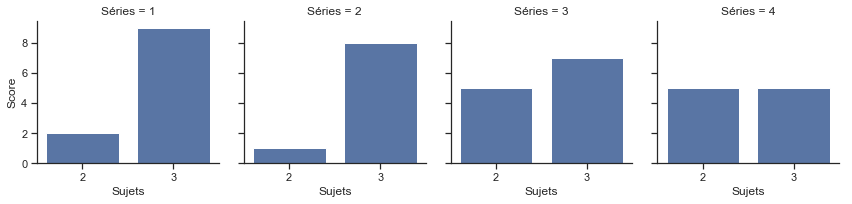

In [89]:
sns.set(style="ticks", color_codes=True)

g = sns.FacetGrid(sujets_score, col="Séries")
g.map(sns.barplot, "Sujets", "Score");

In [90]:
sujets_score.groupby("Séries").mean()

,Sujets,Score
Séries,,
1,2.5,5.5
2,2.5,4.5
3,2.5,6.0
4,2.5,5.0


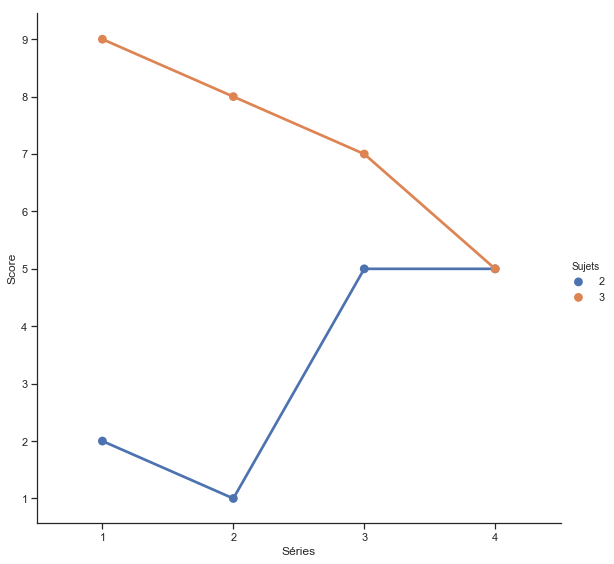

In [91]:
plot_series = sns.catplot(x="Séries", y="Score", hue="Sujets", kind="point", data=sujets_score, size=8);
plot_series.savefig("plot_series.png")

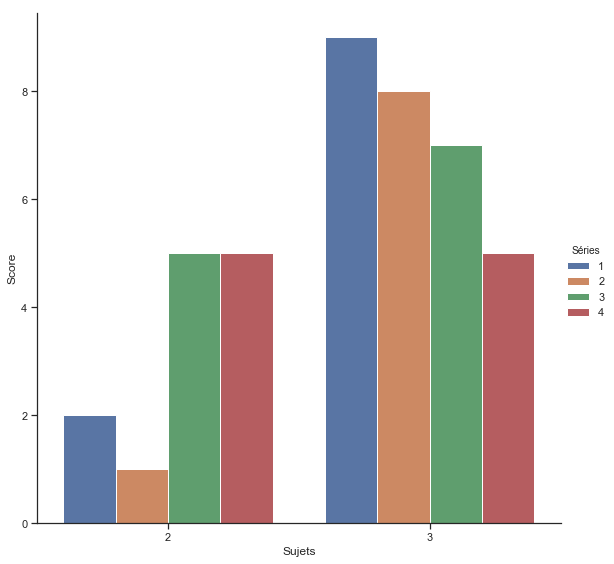

In [92]:
sns.catplot(x="Sujets", y="Score", kind="bar", hue="Séries", data=sujets_score, size = 8);

In [93]:
dfri = df.reset_index()
dfri

,id_sujet,serie,trial,item,correct,key_press,correct_response,rt,time_elapsed,test_part
0,2,1,1,1,1.0,4,4,2085.09,104750,trial_1_1_1
1,2,1,1,2,1.0,9,9,719.27,105470,trial_1_1_2
2,2,1,1,3,1.0,2,2,1021.47,106492,trial_1_1_3
3,2,1,2,1,1.0,4,4,1980.94,113979,trial_1_2_1
4,2,1,2,2,1.0,3,3,912.82,114892,trial_1_2_2
...,...,...,...,...,...,...,...,...,...,...
747,3,4,14,4,NaN,6,8,27.00,966677,trial_4_14_4
748,3,4,14,5,NaN,5,4,26.00,966702,trial_4_14_5
749,3,4,14,6,NaN,4,6,26.00,966728,trial_4_14_6
750,3,4,14,7,NaN,3,7,25.00,966754,trial_4_14_7


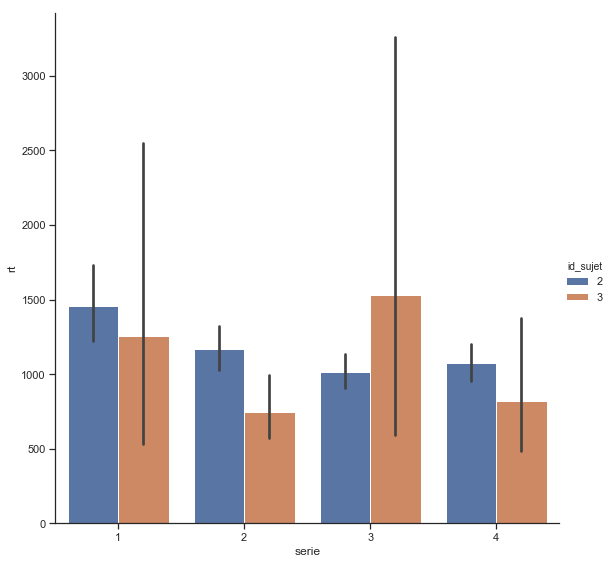

In [94]:
plot_rt = sns.catplot(x="serie", y="rt", hue="id_sujet", kind="bar", data=dfri, size=8);
plot_rt.savefig("plot_rt.png")